### CGH reconstruction by torch

In [9]:
import cv2 as cv
import numpy as np
import torch
import matplotlib.pyplot as plt


M = 1920
N = 1080
h = 0.532 * 0.001
pix = 0.008
z0 = 200
iter = 20

LM = M * pix
LN = N * pix
n = torch.linspace(0, N - 1, N)
m = torch.linspace(0, M - 1, M)
x = -LM / 2 + LM / M * m
y = -LN / 2 + LN / N * n
xx, yy = torch.meshgrid([x, y], indexing='xy')

img = cv.imread('../save/CGH.bmp')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img = cv.resize(img, (M, N))
img = torch.tensor(img)
Phase = img.float() / 255 * 2 * torch.pi
spherical = torch.remainder(torch.pi / z0 * (xx**2+yy**2) / h, 2 * torch.pi)
phase = (Phase - spherical).reshape(1,1,N,M)

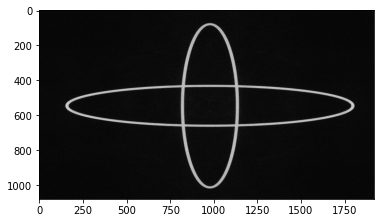

In [10]:
real = torch.cos(phase)
imag = torch.sin(phase)
real_fft = torch.fft.ifft2(real)
real_r = real_fft.clone().real
real_i = real_fft.clone().imag
imag_fft = torch.fft.ifft2(imag)
imag_r = imag_fft.clone().real
imag_i = imag_fft.clone().imag
ur = real_r - imag_i
ui = real_i + imag_r
U_show = (ur.square() + ui.square()).sqrt()

U_show = U_show[0, 0]
save_img = ((U_show / U_show.max()) * 255).int()
plt.imshow(save_img, 'gray')
plt.show()

### test pickle dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zlib
import pickle

data_0 = np.load('C:\\Users\\GUO\\Downloads\\0.pkl', allow_pickle=True)
data_1 = np.load('C:\\Users\\GUO\\Downloads\\1.pkl', allow_pickle=True)
data_2 = np.load('C:\\Users\\GUO\\Downloads\\2.pkl', allow_pickle=True)
data_3 = np.load('C:\\Users\\GUO\\Downloads\\3.pkl', allow_pickle=True)
data_4 = np.load('C:\\Users\\GUO\\Downloads\\4.pkl', allow_pickle=True)
data_5 = np.load('C:\\Users\\GUO\\Downloads\\5.pkl', allow_pickle=True)

train = data_0 + data_1 + data_2 + data_3 + data_4 + data_5

In [ ]:
with open('C:\\Users\\GUO\\Downloads\\train.pkl', 'wb') as f:
    pickle.dump(train, f)

In [ ]:
img = pickle.loads(zlib.decompress(train[10]))
plt.figure(figsize=(10,10))
plt.imshow(img.astype(np.float32), 'gray')
plt.show()